### Slade Brooks
##### brooksl@mail.uc.edu
##### 01.27.2023
# AeroComputing Assignment 2

i don't know linear algebra :(

#### This code does stuff

In [9]:
# print what this code can do
print("something")

something


# Part 1 and 2

In [10]:
# import shtuff
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# pyvot is the module containing the text LU and gauss elim fxns, as well as my cramer rule
import pyvot

# Part 3

In [11]:
# define the inputs for a and b
a = np.array([[10., -2., -1., 2., 3., 1., -4., 7.],
            [5., 11., 3., 10., -3., 3., 3., -4.],
            [7., 12., 1., 5., 3., -12., 2., 3.],
            [8., 7., -2., 1., 3., 2., 2., 4.],
            [2., -15., -1., 1., 4., -1., 8., 3.],
            [4., 2., 9., 1., 12., -1., 4., 1.],
            [-1., 4., -7., -1., 1., 1., -1., -3.],
            [-1., 3., 4., 1., 3., -4., 7., 6.]], dtype="float64")
b = np.array([[0.],
            [-12.],
            [5.],
            [-3.],
            [25.],
            [26.],
            [-9.],
            [7.]], dtype="float64")

In [12]:
# solve all 3 methods and time them

# gauss pivot
t0 = time.perf_counter()
gauss = pyvot.gaussPivot(a.copy(), b.copy())
gausstime = time.perf_counter() - t0
# gauss residual
gaussres = np.average(np.dot(a.copy(), gauss) - b.copy())

# LU
t0 = time.perf_counter()
LUcomp = pyvot.LUdecomp(a.copy())
LUa, seq = LUcomp
LUsolve = pyvot.LUsolve(LUa.copy(), b.copy(), seq.copy())
LUtime = time.perf_counter() - t0
# LU residual
LUres = np.average(np.dot(a.copy(), LUsolve) - b.copy())

# cramer
t0 = time.perf_counter()
cramer = pyvot.cramer(a.copy(), b.copy())
cramertime = time.perf_counter() - t0
# cramer residual
cramres = np.average(np.dot(a.copy(), cramer) - b.copy())

# create dict of sols
sols = {"Method": ["Gauss Pivot", "LU Pivot", "Cramer"],
        "Solution": [gauss.round(3), LUsolve.round(3), cramer.round(3)],}

# create a pandas dataframe
df1 = pd.DataFrame(sols)

print(df1)

        Method                                           Solution
0  Gauss Pivot  [[1.0], [-1.0], [1.0], [-1.0], [1.0], [-1.0], ...
1     LU Pivot  [[1.0], [-1.0], [1.0], [-1.0], [1.0], [-1.0], ...
2       Cramer  [[1.0], [-1.0], [1.0], [-1.0], [1.0], [-1.0], ...


In [13]:
# create and print a table of the performance

# make a dictionary of the values
perf = {"Method": ["Gauss Pivot", "LU Pivot", "Cramer"],
        "Compute Time": [gausstime, LUtime, cramertime],
        "Residual": [gaussres, LUres, cramres]}

# create a pandas dataframe
df = pd.DataFrame(perf)

# output table
print(df)

        Method  Compute Time      Residual
0  Gauss Pivot      0.000624  6.661338e-16
1     LU Pivot      0.000291 -8.881784e-16
2       Cramer      0.000150  4.884981e-15


# Part 4

In [14]:
Amatrices = [np.array([[-15.,  14.],[ -8.,  -5.]]),
np.array([[ 13.,  14.,   8.,  -5.],
       [ -3.,  -9.,  -4.,   7.],
       [-14., -12.,  -9.,  -2.],
       [ 12.,  14.,  -9.,   1.]]),
np.array([[  2.,   4., -10.,   9., -14., -14.],
       [ -7.,   9.,   4.,  -4.,   6.,  -4.],
       [-12.,   5.,  -7.,  14., -10.,  11.],
       [  7., -12.,   1.,  -1.,   4.,   0.],
       [  1.,   1., -10., -13.,  11.,  -3.],
       [  2.,   1.,  14.,  15.,  -1.,  -4.]]),
np.array([[-12.,  12.,  -6.,  14.,   0.,   5.,  15.,   3.],
       [  9., -12.,   8.,   9.,   3., -13.,   3.,  15.],
       [ -5.,   9.,   4.,   1.,   2.,  12.,   5.,  10.],
       [ 13., -10.,   7.,   2., -10.,  10.,  -7.,  -1.],
       [ -8., -13., -11., -12.,  -7.,  -7., -11.,   7.],
       [  2., -13.,   4.,   6., -10., -12.,   0.,  -3.],
       [  3.,  -8.,  14., -12.,  14.,  -2.,   4.,   4.],
       [  6.,   5.,   4., -10.,   5.,   0.,   0., -11.]]),
np.array([[  3.,  11.,  -9.,  -4., -13.,  -6., -14., -15.,   8.,   6.,  -1., -3.],
       [ -3.,   4.,   0.,  12.,  -2.,   9.,   8.,  12.,   4.,  -9.,   3., 0.],
       [ -8., -15.,  12.,   9.,  13., -12.,   7.,  11.,   5.,   7.,  -2., 8.],
       [-13.,   1.,  -5.,  -9.,   0.,   0.,   3.,  10.,   6.,  11.,  -7., 2.],
       [-12.,   4.,  -1.,  -1.,  11.,   3.,  -8., -10.,   0.,  -1.,  -2., 11.],
       [-14., -14.,   6.,   1.,  -6.,   9.,   2.,  -8.,   7., -11.,  13., -4.],
       [ -4.,   6.,  14.,  -9.,  12., -11.,   0.,   7.,   1.,   5.,  -5., 2.],
       [  0.,  -3.,  13.,   5.,   6., -12., -11.,  12., -13.,  -5.,   0., 6.],
       [ -8.,  14., -11., -13.,  14.,  10.,  -7.,   5.,  14.,  14.,  10., -4.],
       [  3.,   7.,  13.,  -9.,   7.,   8.,   6., -15., -14., -14.,   5., -2.],
       [ 14.,  15.,  -3.,  -2.,  13.,  14.,  10., -14., -10.,   2.,   6., 3.],
       [  5., -13.,   3.,  12.,  11.,   9.,  -7.,   0.,   1.,  14.,  11., 8.]])]
Bmatrices = [
np.array([[5.],
        [7.]]),
np.array([[-8.],
       [-8.],
       [-3.],
       [-1.]]),
np.array([[  6.],
       [ 14.],
       [-13.],
       [  2.],
       [ -1.],
       [  1.]]),
np.array([[ -5.],
       [  6.],
       [ 13.],
       [ -8.],
       [-13.],
       [ 13.],
       [-11.],
       [ -5.]]),
np.array([[  6.],
       [-15.],
       [-10.],
       [ 13.],
       [ -3.],
       [-14.],
       [  7.],
       [ -7.],
       [ -1.],
       [ -6.],
       [-12.],
       [-11.]])]

In [19]:
# create vars for plotting
gausstimes = [0, 0, 0, 0, 0]
LUtimes = [0, 0, 0, 0, 0]
cramertimes = [0, 0, 0, 0, 0]
gaussress = [0, 0, 0, 0, 0]
LUress = [0, 0, 0, 0, 0]
cramress = [0, 0, 0, 0, 0]

for i in range(5):
    # compute using each type of thingimajig

    # gauss
    t0 = time.perf_counter()
    gauss = pyvot.gaussPivot(Amatrices[i].copy(), Bmatrices[i].copy())
    gausstime = time.perf_counter() - t0
    # gauss residual
    gaussres = np.average(np.dot(Amatrices[i].copy(), gauss) - Bmatrices[i].copy())

    # LU
    t0 = time.perf_counter()
    LUcomp = pyvot.LUdecomp(Amatrices[i].copy())
    LUa, seq = LUcomp
    LUsolve = pyvot.LUsolve(LUa.copy(), Bmatrices[i].copy(), seq.copy())
    LUtime = time.perf_counter() - t0
    # LU residual
    LUres = np.average(np.dot(Amatrices[i].copy(), LUsolve) - Bmatrices[i].copy())

    # cramer
    t0 = time.perf_counter()
    cramer = pyvot.cramer(Amatrices[i].copy(), Bmatrices[i].copy())
    cramertime = time.perf_counter() - t0
    # cramer residual
    cramres = np.average(np.dot(Amatrices[i].copy(), cramer) - Bmatrices[i].copy())

    # set variables in lists
    gausstimes[i] = gausstime
    LUtimes[i] = LUtime
    cramertimes[i] = cramertime

    gaussress[i] = gaussres
    LUress[i] = LUres
    cramress[i] = cramres

In [20]:
# print table of accuracies for each matrix size
# make a dictionary of the values
acc = {"Matrix Size": ["2", "4", "6", "8", "12"],
        "Gauss Res": [gaussress[0], gaussress[1], gaussress[2], gaussress[3], gaussress[4]],
        "LU Res": [LUress[0], LUress[1], LUress[2], LUress[3], LUress[4]],
        "Cramer Res": [cramress[0], cramress[1], cramress[2], cramress[3], cramress[4]]}

# create a pandas dataframe
df2 = pd.DataFrame(acc)

# output table
print(df2)

  Matrix Size     Gauss Res        LU Res    Cramer Res
0           2  4.440892e-16  4.440892e-16 -3.996803e-15
1           4  1.776357e-15 -2.664535e-15 -6.439294e-15
2           6 -1.776357e-15 -1.776357e-15  1.480297e-16
3           8 -4.884981e-15 -4.440892e-15  2.842171e-14
4          12  9.621933e-16  2.220446e-15 -2.486900e-14


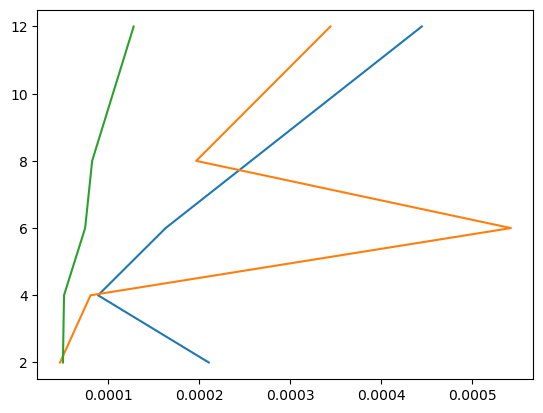

In [23]:
# plot time vs matrix size
matrix = [2, 4, 6, 8, 12]
plt.plot(gausstimes, matrix)
plt.plot(LUtimes, matrix)
plt.plot(cramertimes, matrix)

# format plot


# show that boi
plt.show()

# Part 5